<a href="https://colab.research.google.com/github/hyeineom12/Foreign-Tourists-for-customized-regional-tourism/blob/main/%EC%8B%A0%ED%95%9C%EC%B9%B4%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 드라이브와 연결

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기
필요한 컬럼만 뽑고, 연도 필터링

In [ ]:
file_path = '/content/drive/MyDrive/2. 데이터/data/NATIVE_201901_202508.csv'

In [ ]:
# 사용할 컬럼 지정
use_cols = ['가맹점광역시도', 'GB3', 'GB2', 'SEX_CCD', 'CLN_AGE_R', 'TA_YM', 'VLM', 'USEC']


# 연도 필터링 기준 (2023~2024만)
target_years = ['2023', '2024']

In [ ]:
# 청크를 활용해 큰 데이터셋에서 데이터를 추출

chunks = pd.read_csv(file_path, encoding='cp949', usecols=use_cols, chunksize=100000)
filtered_chunks = []

for i, chunk in enumerate(chunks):
    chunk['TA_YM'] = chunk['TA_YM'].astype(str)
    chunk = chunk[chunk['TA_YM'].str[:4].isin(target_years)]

    if len(chunk) > 0:
        filtered_chunks.append(chunk)
        print(f"Chunk {i+1}: {len(chunk)}행 남음")
    else:
        # 최근 몇 개 청크가 계속 0이면 종료
        print(f"Chunk {i+1}: 조건에 맞는 데이터 없음")
        if i > 5:  # 최근 5개 정도가 다 0이라면
            print("더 이상 조건에 맞는 데이터 없음 → 중단")
            break

df = pd.concat(filtered_chunks, ignore_index=True)
print("\n최종 행/열:", df.shape)

NameError: name 'pd' is not defined

In [ ]:
# 새로운 이름으로 저장

df.to_csv('/content/drive/MyDrive/2. 데이터/data/NATIVE_2023_2024_filtered.csv', index=False)

# 사용할 지역 리스트 설정 및 정렬
국민여행조사에 있던 컬럼만 사용하고, 그룹화 진행하여 정렬

In [ ]:
file_path = '/content/drive/MyDrive/2. 데이터/data/NATIVE_2023_2024_filtered.csv'

In [ ]:
# 불러오기
df1 = pd.read_csv(file_path)

In [ ]:
# 사용할 지역 리스트
target_regions = [
    '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종',
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'
]

# 필터링
df1 = df1[df1['가맹점광역시도'].isin(target_regions)]

In [ ]:
# 1. 분기 컬럼 추가
df1['TA_Q'] = df1['TA_YM'].astype(str).str[:4] + 'Q' + ((df1['TA_YM'].astype(int) % 100 - 1)//3 + 1).astype(str)

# 2. 그룹화 및 집계
group_cols = ['가맹점광역시도', 'GB3', 'GB2', 'SEX_CCD', 'CLN_AGE_R', 'TA_Q']
agg_df = df1.groupby(group_cols, as_index=False).agg({
    'VLM': 'sum',
    'USEC': 'sum'
})

# 3. 소비액 기준 정렬 (선택)
agg_df = agg_df.sort_values('가맹점광역시도')

# 결과 확인
agg_df.head(20)

,가맹점광역시도,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_Q,VLM,USEC
0,강원,문화예술활동,공연관람,F,20,2023Q1,1.499032e+09,91030
1502,강원,취미오락,독서,M,40,2024Q3,1.221924e+09,36426
1501,강원,취미오락,독서,M,40,2024Q2,1.140181e+09,33455
1500,강원,취미오락,독서,M,40,2024Q1,1.438078e+09,38659
1499,강원,취미오락,독서,M,40,2023Q4,1.274949e+09,35436
1498,강원,취미오락,독서,M,40,2023Q3,1.437637e+09,38774
1497,강원,취미오락,독서,M,40,2023Q2,1.459733e+09,42029
1496,강원,취미오락,독서,M,40,2023Q1,2.071352e+09,53429
1495,강원,취미오락,독서,M,30,2024Q4,5.380529e+08,16775
1494,강원,취미오락,독서,M,30,2024Q3,5.407627e+08,18157


In [ ]:
pd.set_option('display.float_format', '{:,.0f}'.format)

In [ ]:
# CSV로 저장
output_path = '/content/drive/MyDrive/2. 데이터/data/processed_data.csv'
agg_df.to_csv(output_path, index=False, encoding='utf-8-sig')

# 필요한 정보 시각화

In [ ]:
file_path = '/content/drive/MyDrive/2. 데이터/data/processed_data.csv'

In [ ]:
# 불러오기
df2 = pd.read_csv(file_path)

In [ ]:
df2.isnull().sum()

,0
가맹점광역시도,0
GB3,0
GB2,0
SEX_CCD,0
CLN_AGE_R,0
TA_Q,0
VLM,0
USEC,0


모든 컬럼에 null 값이 0이므로 추가 전처리 없이 시각화 진행

In [ ]:
# 한국어 설정

import matplotlib.font_manager as fm
from matplotlib import rc

# 나눔고딕 폰트 경로 찾기
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=12)

# 폰트 설정# 1) 나눔 글꼴 설치
!apt-get -qq update
!apt-get -qq install fonts-nanum

# 2) matplotlib 폰트 캐시 삭제
import shutil, os
shutil.rmtree(os.path.expanduser("~/.cache/matplotlib"), ignore_errors=True)

# 3) 폰트 수동 등록 + 기본 폰트로 지정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)              # 새 폰트를 매니저에 등록
rcParams["font.family"] = "NanumGothic"        # 기본 폰트로 지정
rcParams["axes.unicode_minus"] = False         # 음수기호 깨짐 방지


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# 서울, 인천, 경기 포함 소비 금액 막대그래프

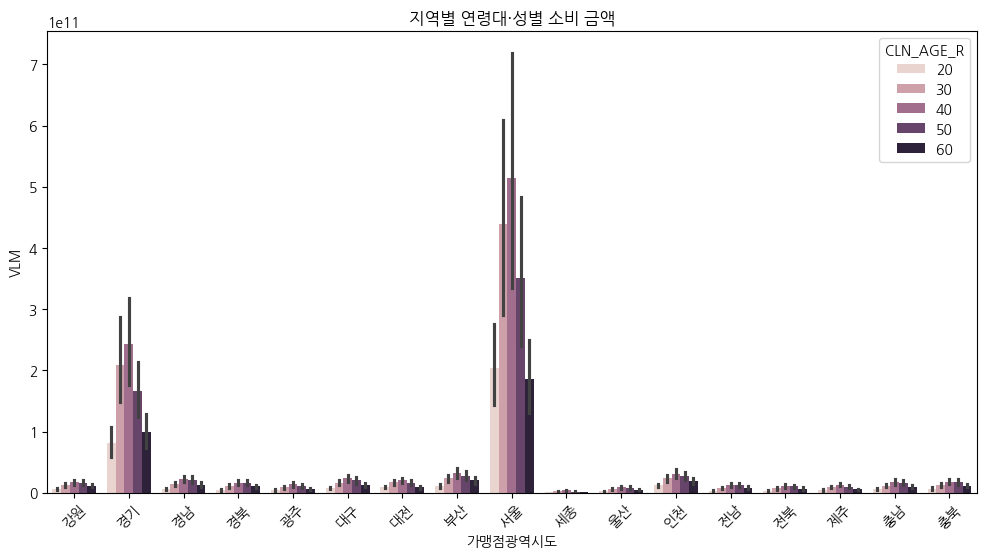

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df2, x='가맹점광역시도', y='VLM', hue='CLN_AGE_R')
plt.xticks(rotation=45)
plt.title("지역별 연령대·성별 소비 금액")
plt.show()

# 서울, 인천, 경기 제외 소비 금액 막대그래프

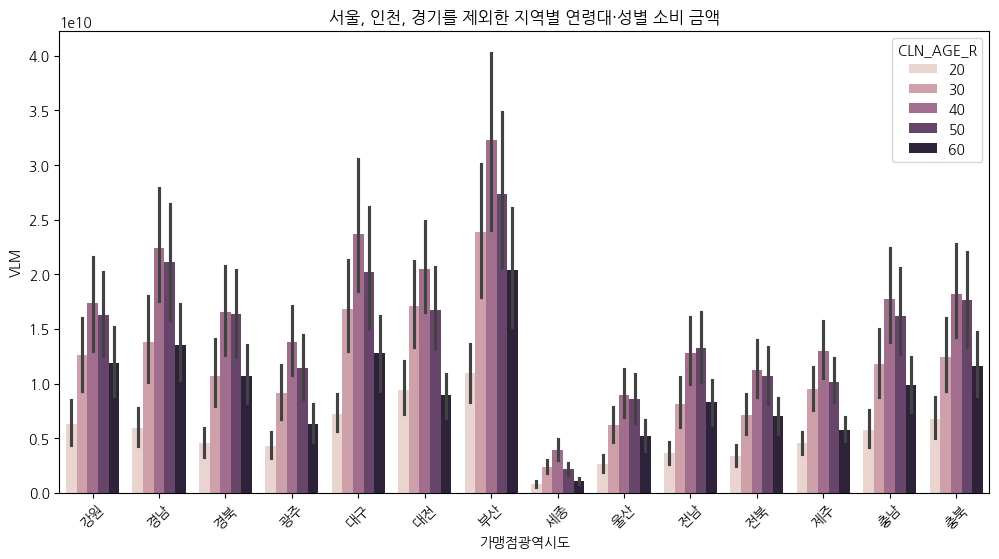

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 제외할 지역
exclude_regions = ['서울', '인천', '경기']

# 제외하고 필터링
df2_filtered = df2[~df2['가맹점광역시도'].isin(exclude_regions)]

plt.figure(figsize=(12,6))
sns.barplot(data=df2_filtered, x='가맹점광역시도', y='VLM', hue='CLN_AGE_R')
plt.xticks(rotation=45)
plt.title("서울, 인천, 경기를 제외한 지역별 연령대·성별 소비 금액")
plt.show()

# 서울, 인천, 경기 포함 소비 금액 산점도

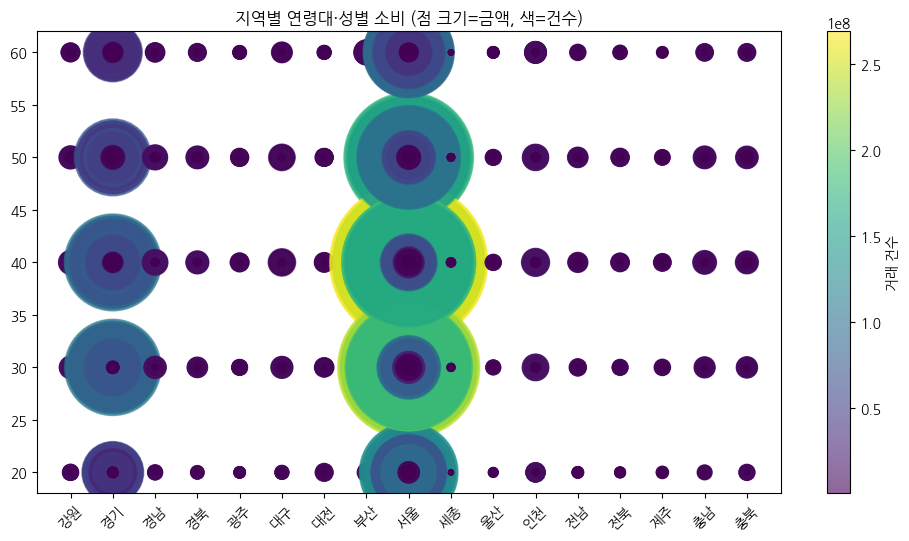

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df2['가맹점광역시도'], df2['CLN_AGE_R'], s=df2['VLM']/1e9, c=df2['USEC'], cmap='viridis', alpha=0.6)
plt.colorbar(label='거래 건수')
plt.xticks(rotation=45)
plt.title("지역별 연령대·성별 소비 (점 크기=금액, 색=건수)")
plt.show()

# 서울, 인천, 경기 제외 소비 금액 산점도

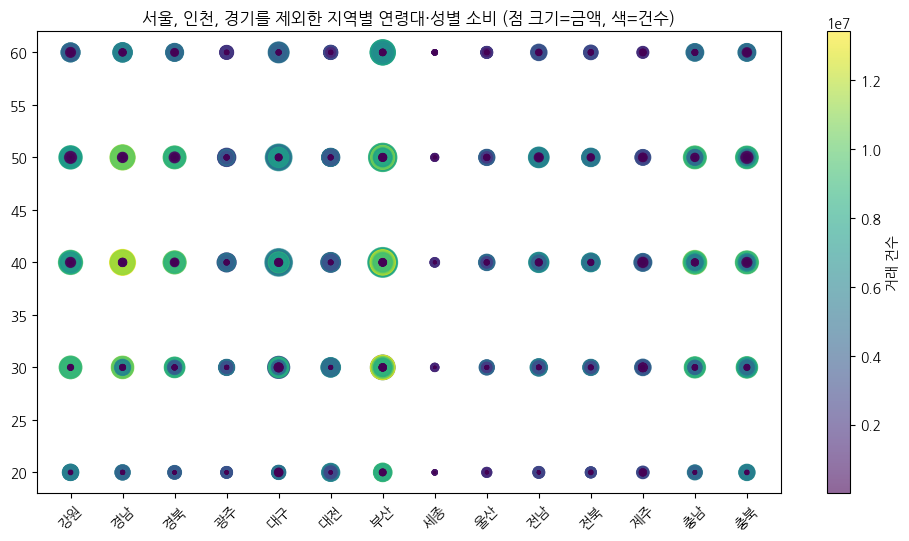

In [ ]:
import matplotlib.pyplot as plt

# 제외할 지역
exclude_regions = ['서울', '인천', '경기']

# 제외하고 필터링
df_filtered = df2[~df2['가맹점광역시도'].isin(exclude_regions)]

plt.figure(figsize=(12,6))
plt.scatter(
    df_filtered['가맹점광역시도'],
    df_filtered['CLN_AGE_R'],
    s=df_filtered['VLM']/1e9,  # 점 크기: 금액
    c=df_filtered['USEC'],     # 색상: 거래 건수
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(label='거래 건수')
plt.xticks(rotation=45)
plt.title("서울, 인천, 경기를 제외한 지역별 연령대·성별 소비 (점 크기=금액, 색=건수)")
plt.show()


In [ ]:
df2['GB2'].unique()


array(['공연관람', '독서', '목욕', '교육훈련', '미용', '여행사', '숙박', '체험', '애완동물돌보기',
       '종교활동', '종합쇼핑', '인터넷게임', '패션쇼핑', '외식', '유흥', '교통', '음악감상', '골프',
       '악기연주', '레저스포츠', '미술공예참여', '사진촬영', '스키', '헬스', '관광쇼핑', '자전거',
       '스포츠용품구매', '운동경기관람'], dtype=object)

In [ ]:
df2['GB3'].unique()

array(['문화예술활동', '취미오락', '여행', '스포츠활동'], dtype=object)

In [ ]:
df2[['GB3', 'GB2']].drop_duplicates().sort_values(['GB3','GB2'])

,GB3,GB2
0,문화예술활동,공연관람
1402,문화예술활동,미술공예참여
1545,문화예술활동,사진촬영
1192,문화예술활동,악기연주
1122,문화예술활동,음악감상
1157,스포츠활동,골프
1262,스포츠활동,레저스포츠
1682,스포츠활동,스키
1963,스포츠활동,스포츠용품구매
2106,스포츠활동,운동경기관람


# 각 지역별 GB2(소분류)별 연령대, 성별 소비 비율

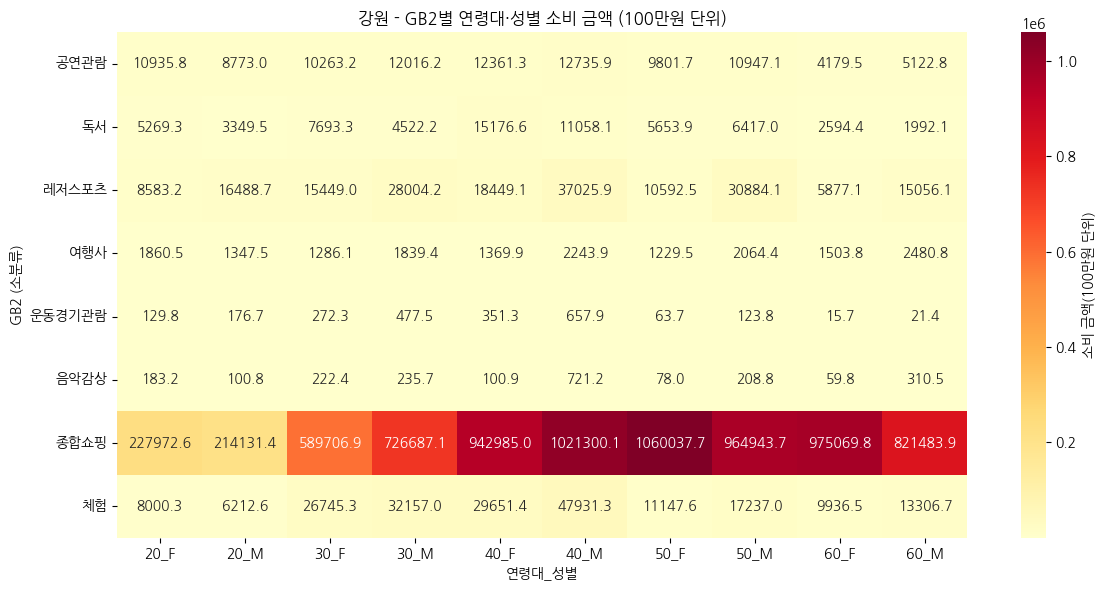

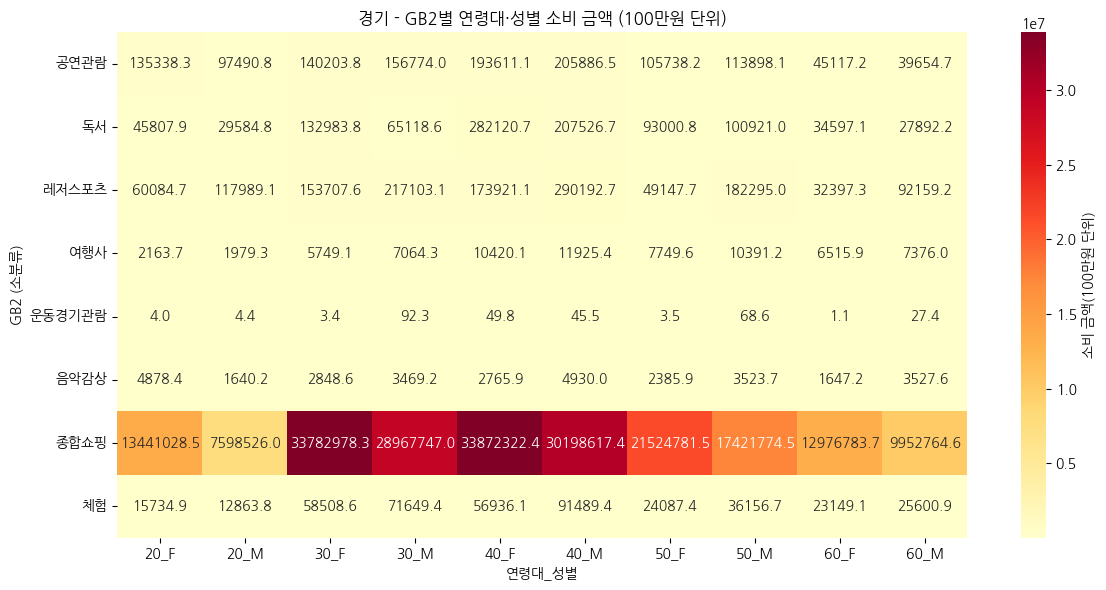

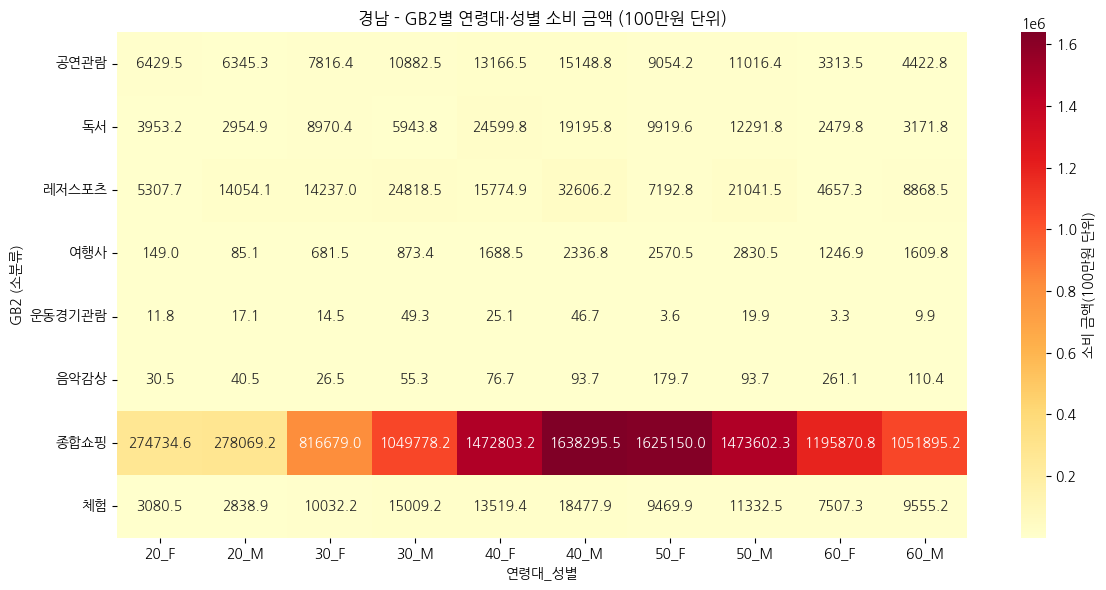

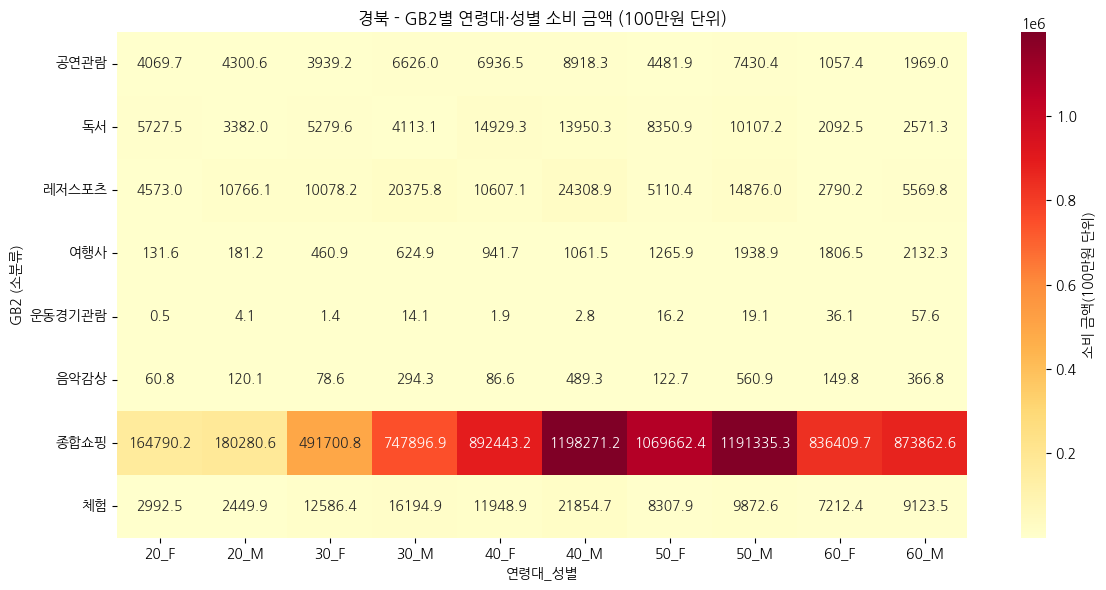

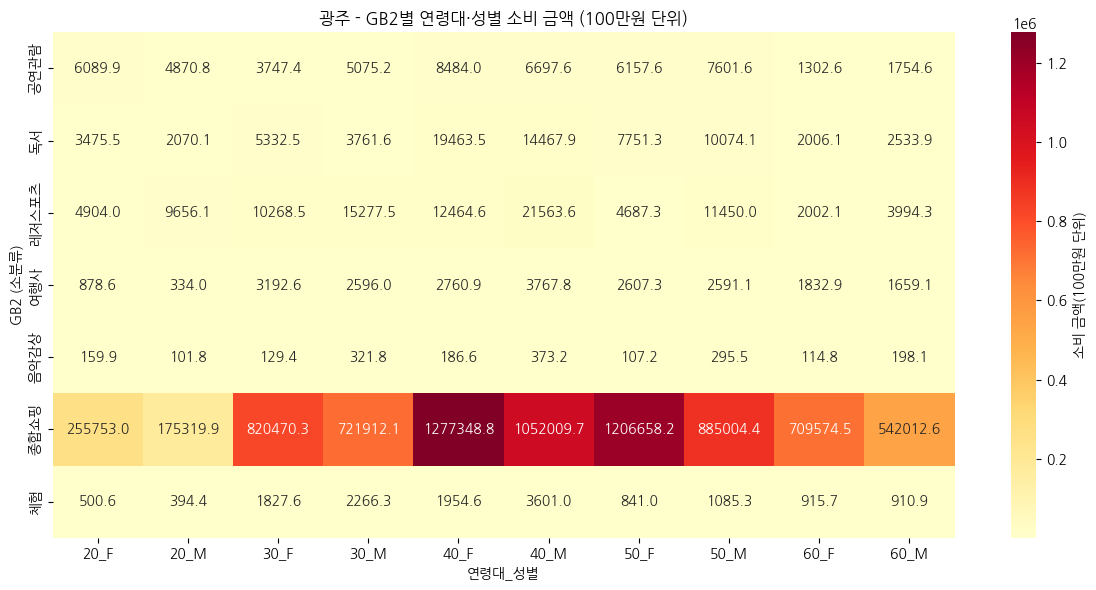

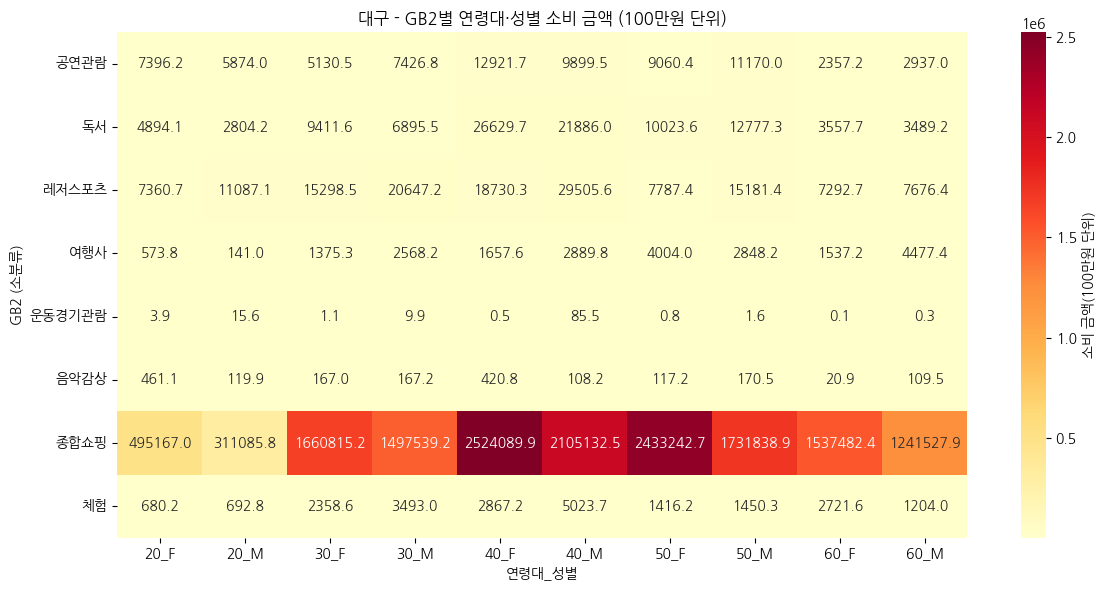

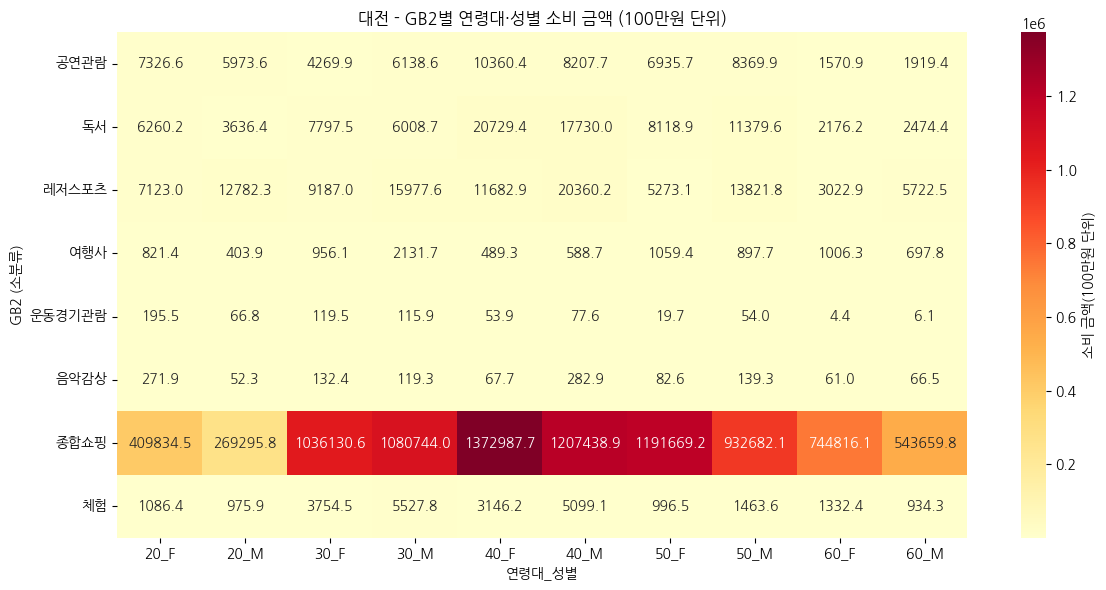

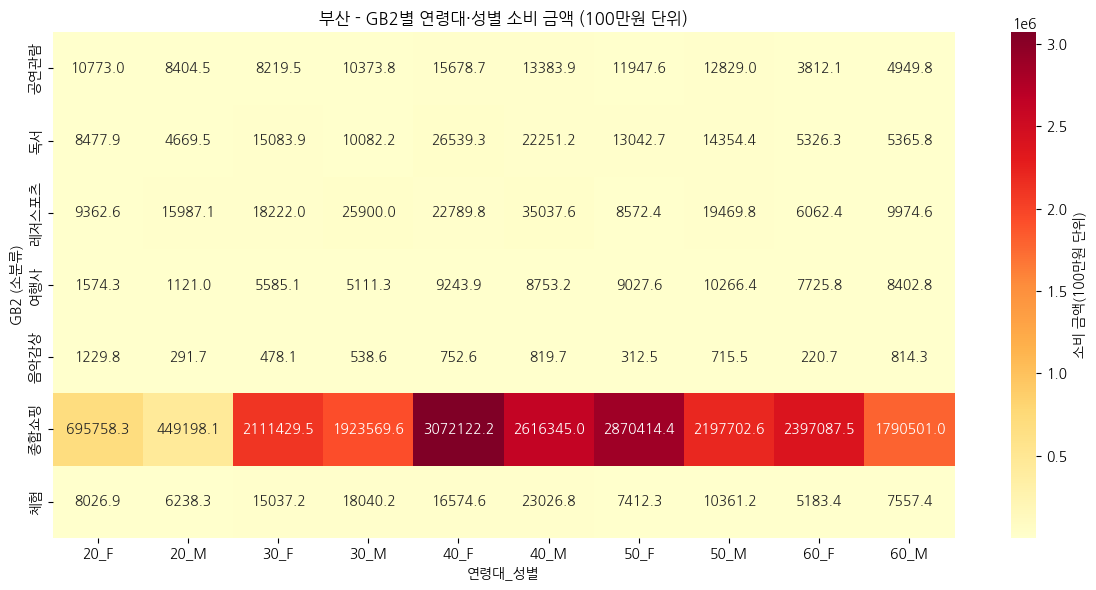

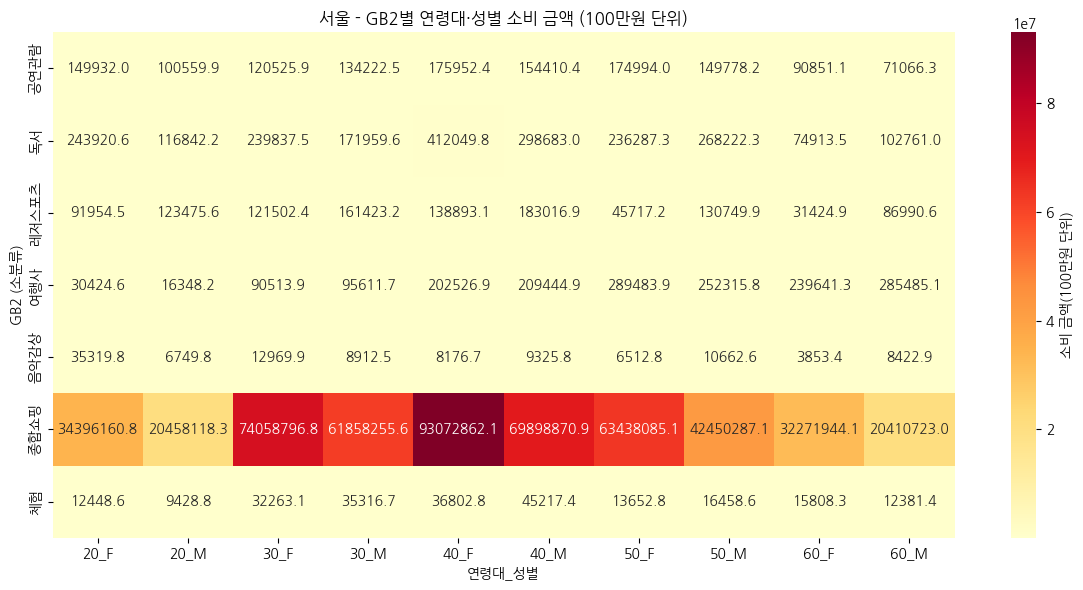

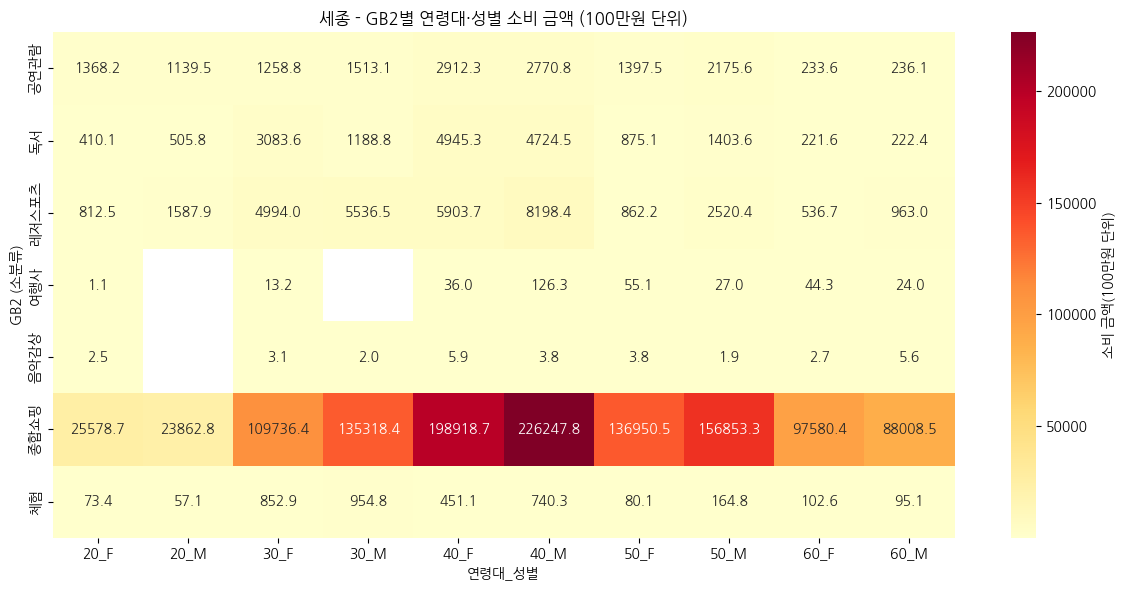

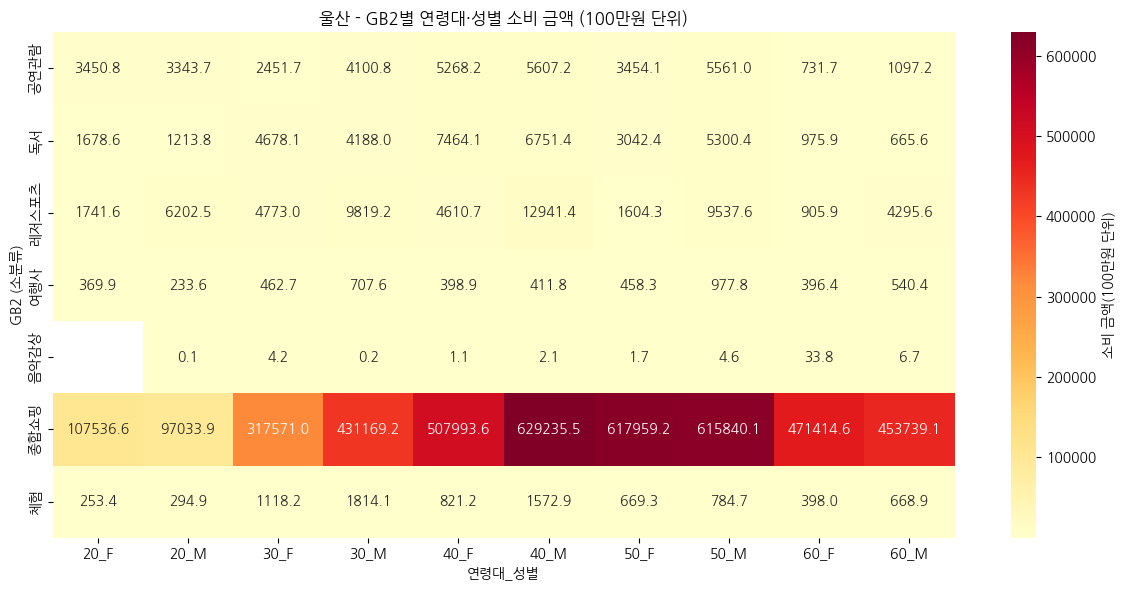

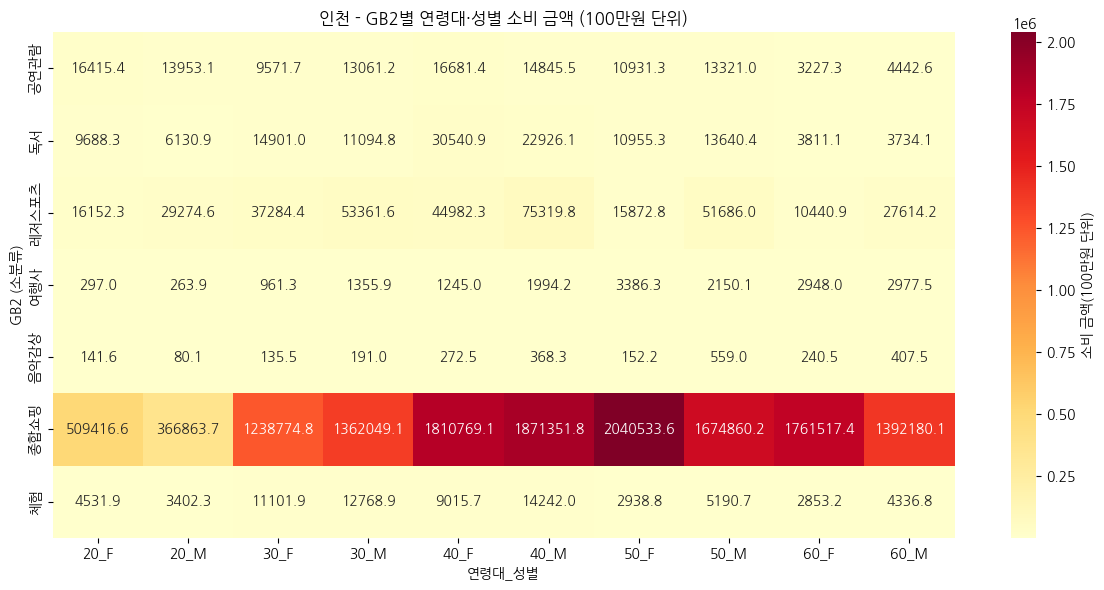

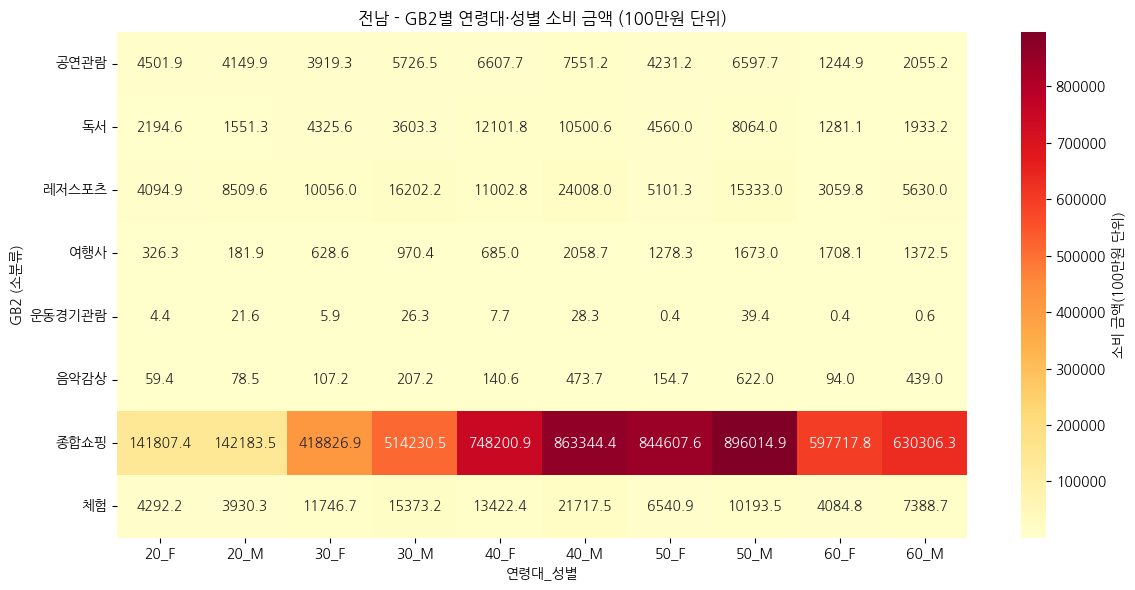

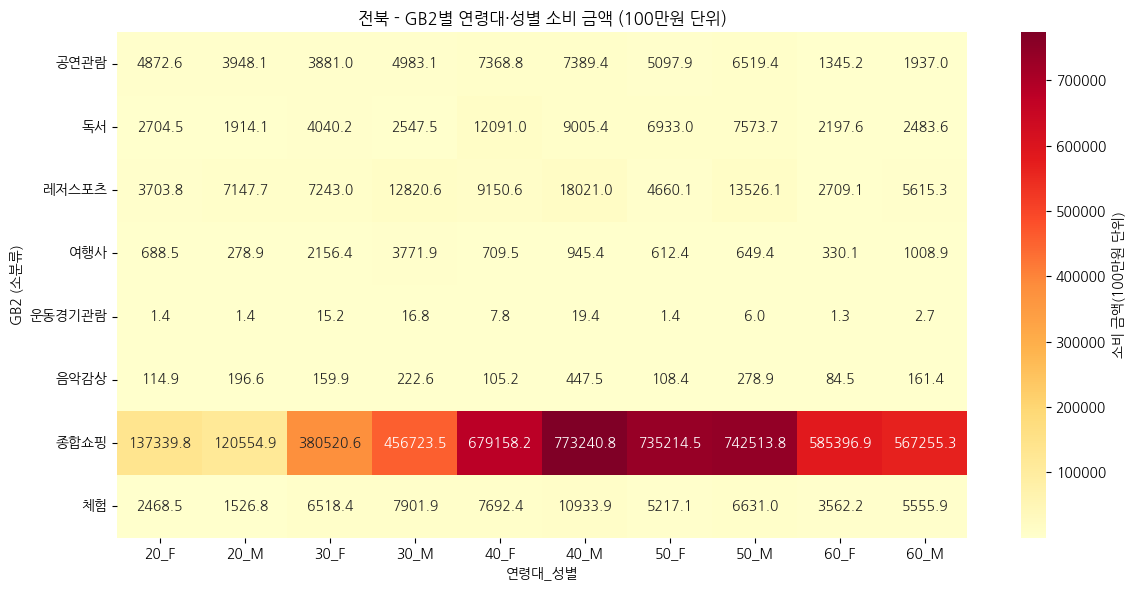

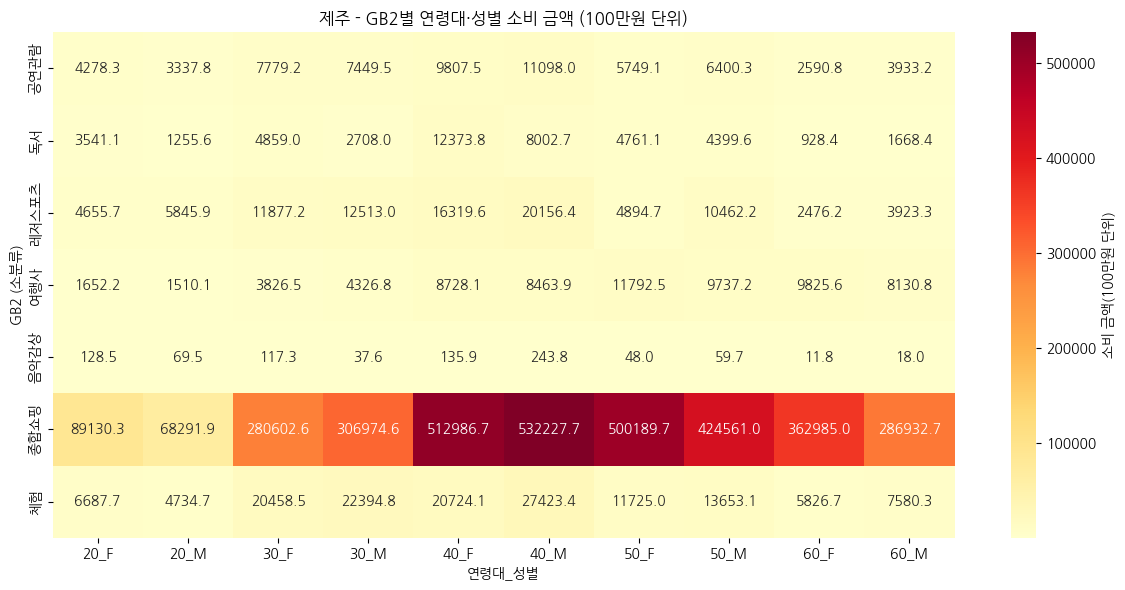

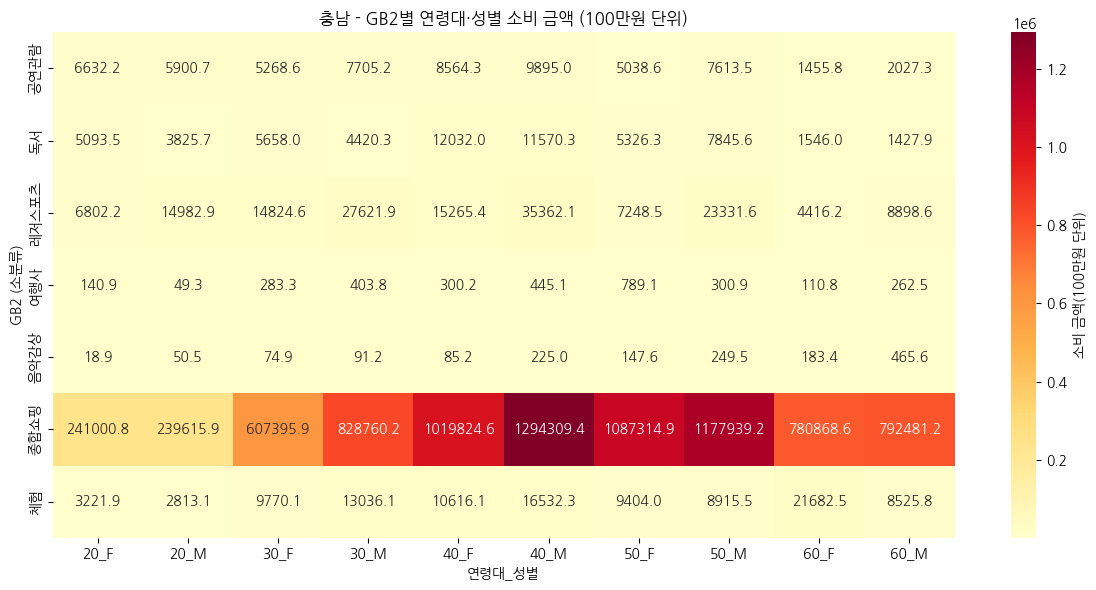

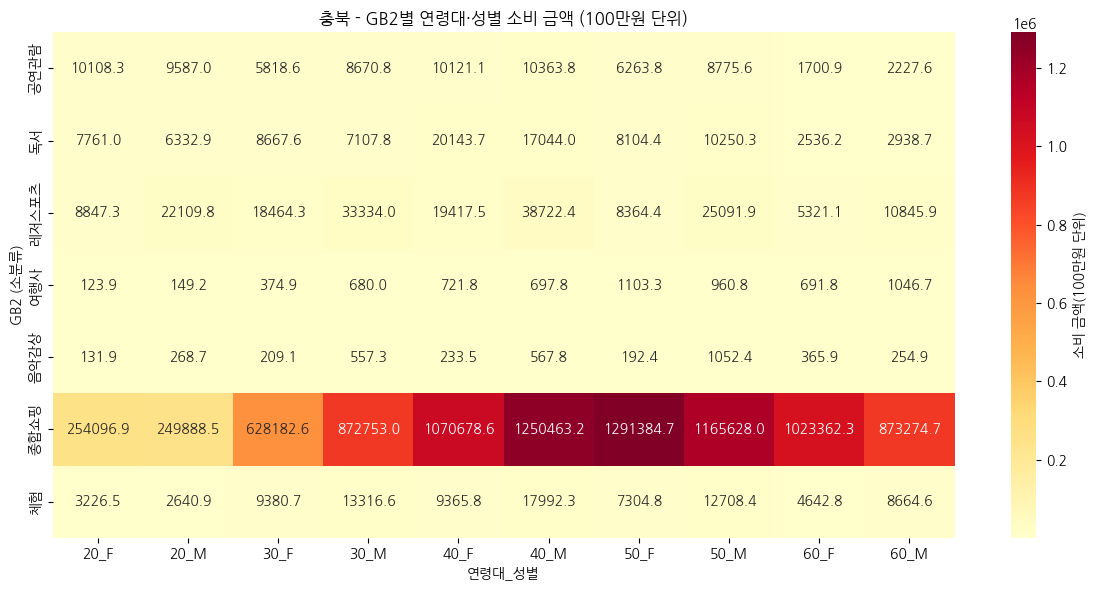

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연령대·성별 결합
df2['연령대_성별'] = df2['CLN_AGE_R'].astype(str) + '_' + df2['SEX_CCD']

# 사용할 관광 관련 GB2 리스트
tourism_gb2 = [
    '공연관람', '독서', '여행사', '체험', '종합쇼핑',
    '음악감상', '레저스포츠', '운동경기관람'
]

# 필터링 (관광 관련 GB2 + 20대 이상만)
df_tourism = df2[df2['GB2'].isin(tourism_gb2) & (df2['CLN_AGE_R'] >= 20)]

# 지역별·GB2별·연령대_성별 합계
df_grouped = (
    df_tourism.groupby(['가맹점광역시도', 'GB2', '연령대_성별'], observed=True)['VLM']
    .sum()
    .reset_index()
)

# 🔹 보기 쉽게 금액 단위 축소 (100만원 단위)
df_grouped['VLM_100만원'] = df_grouped['VLM'] / 1000000

# 연령대 정렬 (20대부터 아래로)
age_order = [
    '20_F', '20_M', '30_F', '30_M', '40_F', '40_M',
    '50_F', '50_M', '60_F', '60_M', '70_F', '70_M'
]

# 지역별 히트맵 생성
regions = df_grouped['가맹점광역시도'].unique()
for region in regions:
    df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

    # 피벗 테이블: 행=GB2, 열=연령대_성별, 값=소비 금액(100만원 단위)
    pivot = df_region.pivot(index='GB2', columns='연령대_성별', values='VLM_100만원')

    # 열 순서 정렬
    pivot = pivot.reindex(columns=[c for c in age_order if c in pivot.columns])

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot, annot=True, fmt=".1f", cmap='YlOrRd',
        cbar_kws={'label': '소비 금액(100만원 단위)'}
    )
    plt.title(f"{region} - GB2별 연령대·성별 소비 금액 (100만원 단위)")
    plt.xlabel("연령대_성별")
    plt.ylabel("GB2 (소분류)")
    plt.tight_layout()
    plt.show()


# 지역별 top3 출력

In [ ]:
region = "강원"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,체험,레저스포츠
3,30_M,종합쇼핑,체험,레저스포츠
4,40_F,종합쇼핑,체험,레저스포츠
5,40_M,종합쇼핑,체험,레저스포츠
6,50_F,종합쇼핑,체험,레저스포츠
7,50_M,종합쇼핑,레저스포츠,체험
8,60_F,종합쇼핑,체험,레저스포츠
9,60_M,종합쇼핑,레저스포츠,체험


In [ ]:
region = "경남"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,체험
3,30_M,종합쇼핑,레저스포츠,체험
4,40_F,종합쇼핑,독서,레저스포츠
5,40_M,종합쇼핑,레저스포츠,독서
6,50_F,종합쇼핑,독서,체험
7,50_M,종합쇼핑,레저스포츠,독서
8,60_F,종합쇼핑,체험,레저스포츠
9,60_M,종합쇼핑,체험,레저스포츠


In [ ]:
region = "경북"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,독서,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,체험,레저스포츠
3,30_M,종합쇼핑,레저스포츠,체험
4,40_F,종합쇼핑,독서,체험
5,40_M,종합쇼핑,레저스포츠,체험
6,50_F,종합쇼핑,독서,체험
7,50_M,종합쇼핑,레저스포츠,독서
8,60_F,종합쇼핑,체험,레저스포츠
9,60_M,종합쇼핑,체험,레저스포츠


In [ ]:
region = "광주"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,독서
3,30_M,종합쇼핑,레저스포츠,공연관람
4,40_F,종합쇼핑,독서,레저스포츠
5,40_M,종합쇼핑,레저스포츠,독서
6,50_F,종합쇼핑,독서,공연관람
7,50_M,종합쇼핑,레저스포츠,독서
8,60_F,종합쇼핑,독서,레저스포츠
9,60_M,종합쇼핑,레저스포츠,독서


In [ ]:
region = "대구"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,독서
3,30_M,종합쇼핑,레저스포츠,공연관람
4,40_F,종합쇼핑,독서,레저스포츠
5,40_M,종합쇼핑,레저스포츠,독서
6,50_F,종합쇼핑,독서,공연관람
7,50_M,종합쇼핑,레저스포츠,독서
8,60_F,종합쇼핑,레저스포츠,독서
9,60_M,종합쇼핑,레저스포츠,여행사


In [ ]:
region = "대전"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,독서
3,30_M,종합쇼핑,레저스포츠,공연관람
4,40_F,종합쇼핑,독서,레저스포츠
5,40_M,종합쇼핑,레저스포츠,독서
6,50_F,종합쇼핑,독서,공연관람
7,50_M,종합쇼핑,레저스포츠,독서
8,60_F,종합쇼핑,레저스포츠,독서
9,60_M,종합쇼핑,레저스포츠,독서


In [ ]:
region = "울산"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,독서
3,30_M,종합쇼핑,레저스포츠,독서
4,40_F,종합쇼핑,독서,공연관람
5,40_M,종합쇼핑,레저스포츠,독서
6,50_F,종합쇼핑,공연관람,독서
7,50_M,종합쇼핑,레저스포츠,공연관람
8,60_F,종합쇼핑,독서,레저스포츠
9,60_M,종합쇼핑,레저스포츠,공연관람


In [ ]:
region = "전남"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,체험
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,체험,레저스포츠
3,30_M,종합쇼핑,레저스포츠,체험
4,40_F,종합쇼핑,체험,독서
5,40_M,종합쇼핑,레저스포츠,체험
6,50_F,종합쇼핑,체험,레저스포츠
7,50_M,종합쇼핑,레저스포츠,체험
8,60_F,종합쇼핑,체험,레저스포츠
9,60_M,종합쇼핑,체험,레저스포츠


In [ ]:
region = "전북"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,체험
3,30_M,종합쇼핑,레저스포츠,체험
4,40_F,종합쇼핑,독서,레저스포츠
5,40_M,종합쇼핑,레저스포츠,체험
6,50_F,종합쇼핑,독서,체험
7,50_M,종합쇼핑,레저스포츠,독서
8,60_F,종합쇼핑,체험,레저스포츠
9,60_M,종합쇼핑,레저스포츠,체험


In [ ]:
region = "제주"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,체험,레저스포츠
1,20_M,종합쇼핑,레저스포츠,체험
2,30_F,종합쇼핑,체험,레저스포츠
3,30_M,종합쇼핑,체험,레저스포츠
4,40_F,종합쇼핑,체험,레저스포츠
5,40_M,종합쇼핑,체험,레저스포츠
6,50_F,종합쇼핑,여행사,체험
7,50_M,종합쇼핑,체험,레저스포츠
8,60_F,종합쇼핑,여행사,체험
9,60_M,종합쇼핑,여행사,체험


In [ ]:
region = "충북"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,체험
3,30_M,종합쇼핑,레저스포츠,체험
4,40_F,종합쇼핑,독서,레저스포츠
5,40_M,종합쇼핑,레저스포츠,체험
6,50_F,종합쇼핑,레저스포츠,독서
7,50_M,종합쇼핑,레저스포츠,체험
8,60_F,종합쇼핑,레저스포츠,체험
9,60_M,종합쇼핑,레저스포츠,체험


In [ ]:
region = "충남"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,레저스포츠,공연관람
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,체험
3,30_M,종합쇼핑,레저스포츠,체험
4,40_F,종합쇼핑,레저스포츠,독서
5,40_M,종합쇼핑,레저스포츠,체험
6,50_F,종합쇼핑,체험,레저스포츠
7,50_M,종합쇼핑,레저스포츠,체험
8,60_F,종합쇼핑,체험,레저스포츠
9,60_M,종합쇼핑,레저스포츠,체험


In [ ]:
region = "부산"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,독서
3,30_M,종합쇼핑,레저스포츠,체험
4,40_F,종합쇼핑,독서,레저스포츠
5,40_M,종합쇼핑,레저스포츠,체험
6,50_F,종합쇼핑,독서,공연관람
7,50_M,종합쇼핑,레저스포츠,독서
8,60_F,종합쇼핑,여행사,레저스포츠
9,60_M,종합쇼핑,레저스포츠,여행사


In [ ]:
region = "세종"

df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

top3_wide = (
    df_region
    .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
    .groupby('연령대_성별')
    .head(3)
    .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
    .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
    .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
    .reset_index()
)

top3_wide


rank,연령대_성별,TOP1_GB2,TOP2_GB2,TOP3_GB2
0,20_F,종합쇼핑,공연관람,레저스포츠
1,20_M,종합쇼핑,레저스포츠,공연관람
2,30_F,종합쇼핑,레저스포츠,독서
3,30_M,종합쇼핑,레저스포츠,공연관람
4,40_F,종합쇼핑,레저스포츠,독서
5,40_M,종합쇼핑,레저스포츠,독서
6,50_F,종합쇼핑,공연관람,독서
7,50_M,종합쇼핑,레저스포츠,공연관람
8,60_F,종합쇼핑,레저스포츠,공연관람
9,60_M,종합쇼핑,레저스포츠,공연관람


## **전체 데이터로 저장**

In [ ]:
regions = df_grouped['가맹점광역시도'].unique()

top3_by_region = {}   # 최종적으로 모든 지역 데이터가 저장될 변수

for region in regions:
    df_region = df_grouped[df_grouped['가맹점광역시도'] == region]

    top3_wide = (
        df_region
        .sort_values(['연령대_성별', 'VLM_100만원'], ascending=[True, False])
        .groupby('연령대_성별')
        .head(3)
        .assign(rank=lambda x: x.groupby('연령대_성별').cumcount() + 1)
        .pivot_table(index='연령대_성별', columns='rank', values='GB2', aggfunc='first')
        .rename(columns={1: 'TOP1_GB2', 2: 'TOP2_GB2', 3: 'TOP3_GB2'})
        .reset_index()
    )

    top3_by_region[region] = top3_wide

In [ ]:
import pickle

with open('/content/drive/MyDrive/2. 데이터/top3_by_region.pkl', 'wb') as f:
    pickle.dump(top3_by_region, f)